In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터 프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [2]:
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [3]:
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

In [4]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [5]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

In [6]:
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

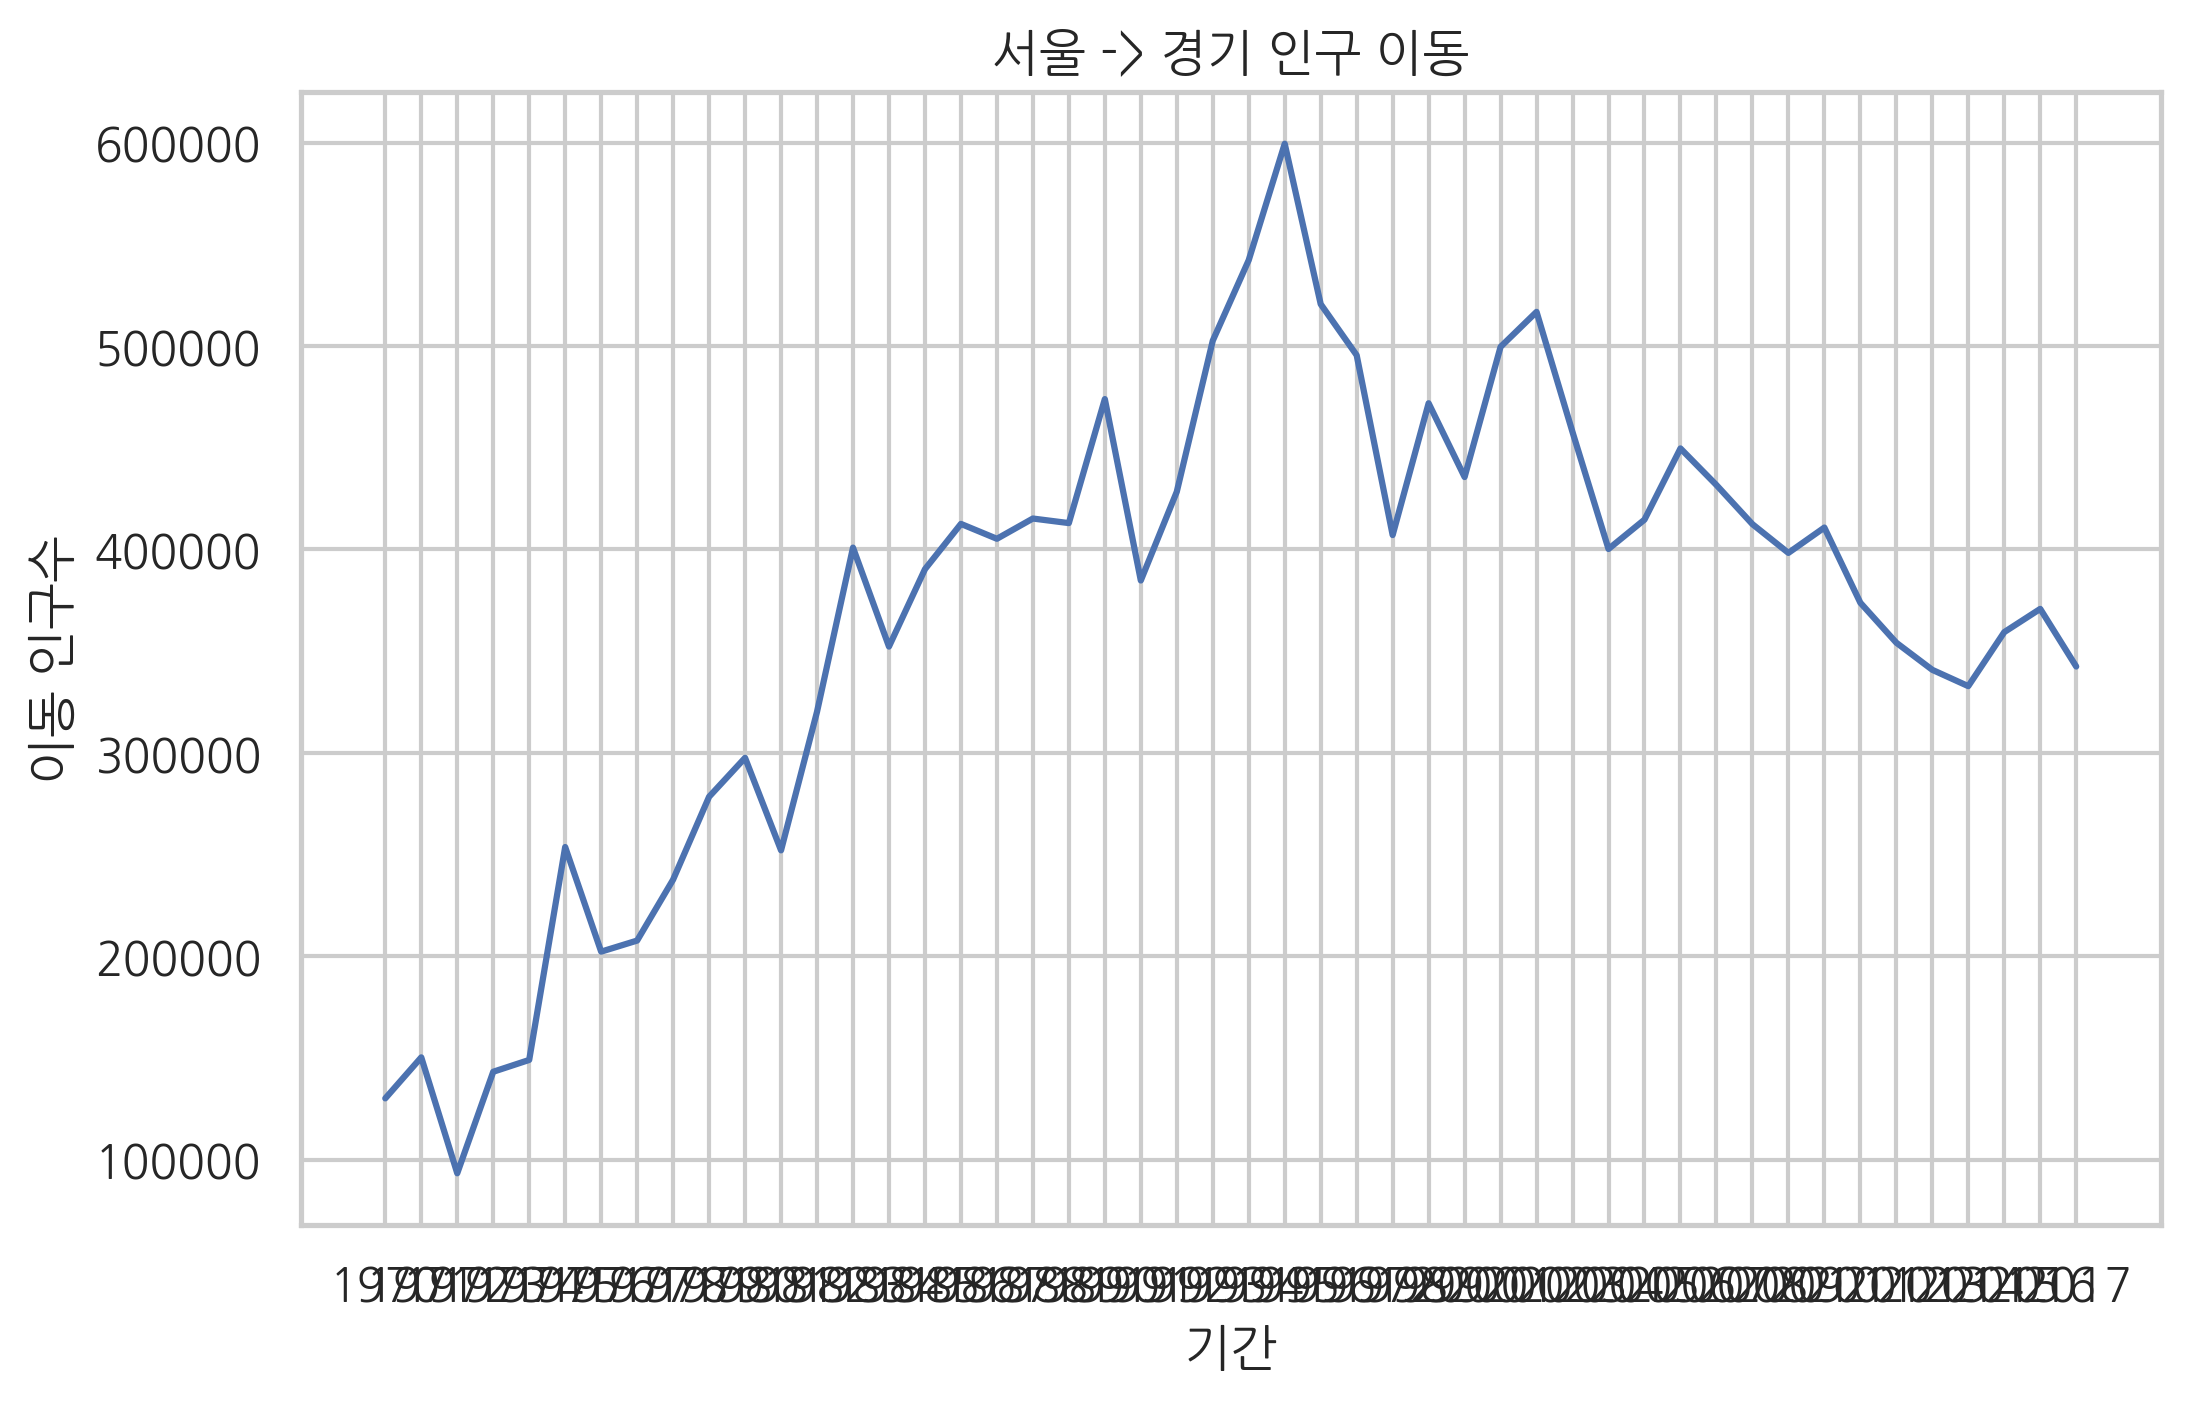

In [13]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)
# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')
# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
# 변경사항 저장하고 그래프 출력
plt.show()
